# Adherencia- Calidad de Vida
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base de interés
base = pd.read_excel('C:/Users/Usuario/Documents/Eda_Adherencia/Adherencia.xlsx')
base.head()

,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cualitativo_ponderado,Cuantitativo_ponderado
0,1101180,2012-04-24,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,4.0,NO ADHERENTE,95-100%
1,1101180,2012-11-26,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%
2,529410,2012-04-19,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
3,979605,2013-03-04,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%
4,1198956,2012-05-16,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%


In [3]:
# Base de ids
ids = pd.read_excel('C:/Users/Usuario/Documents/Eda_Adherencia/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [4]:
base.describe()

,ds_identificacion,nm_espa
count,5.274000e+03,5265.000000
mean,1.239956e+06,5.117189
std,4.302811e+05,1.802707
min,5.005470e+05,0.000000
25%,8.734220e+05,5.000000
50%,1.226479e+06,6.000000
75%,1.617372e+06,6.000000
max,1.999629e+06,6.000000


In [5]:
base.dtypes

ds_identificacion                  int64
FE_ENTREVISTA             datetime64[ns]
Morisky_Green                     object
Smaq1                             object
Smaq2                             object
Espa                              object
nm_espa                          float64
Cualitativo_ponderado             object
Cuantitativo_ponderado            object
dtype: object

Los tipos son consistentes con lo esperado: Identificación es de tipo numérico, FE_ALTA es fecha, Dimensiones es string, y 0_100 es numérico.

## 2. Aporte Conceptual



## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [6]:
# Identificaciones únicas en la tabla de pacientes:
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [9]:
# Identificaciones únias en la tabla de Calidad: 
ids_base = base.groupby(['ds_identificacion']).count().reset_index()
ids_base.describe()

,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cualitativo_ponderado,Cuantitativo_ponderado
count,8.490000e+02,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,1.257614e+06,6.212014,6.196702,6.196702,6.196702,6.196702,6.201413,6.196702,6.196702
std,4.365285e+05,5.333659,5.321520,5.321520,5.321520,5.321520,5.325109,5.321520,5.321520
min,5.005470e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.876270e+05,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.252923e+06,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,1.650539e+06,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1.999629e+06,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000


In [11]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'left', left_on = 'ds_identificacion', right_on ='ID')
cruce.describe()

,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cualitativo_ponderado,Cuantitativo_ponderado,ID,edad
count,8.490000e+02,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,8.490000e+02,849.000000
mean,1.257614e+06,6.212014,6.196702,6.196702,6.196702,6.196702,6.201413,6.196702,6.196702,1.257614e+06,1.017668
std,4.365285e+05,5.333659,5.321520,5.321520,5.321520,5.321520,5.325109,5.321520,5.321520,4.365285e+05,0.140480
min,5.005470e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.005470e+05,1.000000
25%,8.876270e+05,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.876270e+05,1.000000
50%,1.252923e+06,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.252923e+06,1.000000
75%,1.650539e+06,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.650539e+06,1.000000
max,1.999629e+06,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,1.999629e+06,3.000000


In [13]:
base.columns

Index(['ds_identificacion', 'FE_ENTREVISTA', 'Morisky_Green', 'Smaq1', 'Smaq2',
       'Espa', 'nm_espa', 'Cualitativo_ponderado', 'Cuantitativo_ponderado'],
      dtype='object')

## 4. Exploración
### 4.1 Distribuciones
### FE_ALTA

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


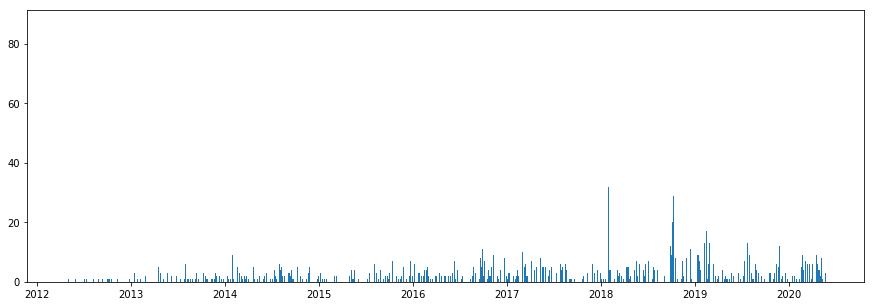

In [14]:
# plot
base_gf = base.groupby('FE_ENTREVISTA').count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf['FE_ENTREVISTA'], base_gf['ds_identificacion'] )

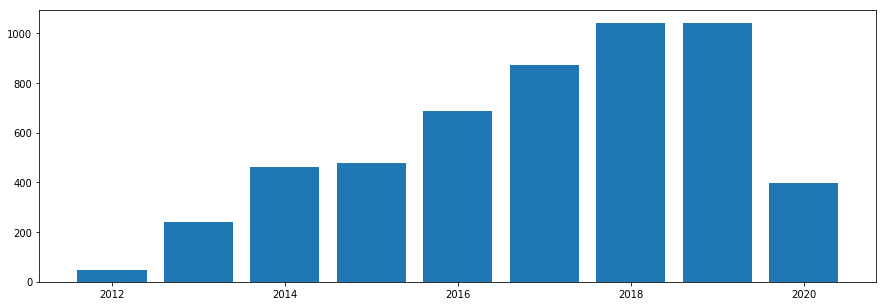

In [15]:
base_gf['year'] = base_gf['FE_ENTREVISTA'].apply( lambda x: x.year )
base_gf_gy = base_gf.groupby('year')['ds_identificacion'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['year'], base_gf_gy['ds_identificacion'] )

Se encuentra que la mayoría de las encuestas están para 2017. El número de encuestas para 2018 en adelante es muy bajo. Esto podría tener como consecuencia que la información no pueda usarse.

### Dimensiones

In [16]:
base['year'] = base['FE_ENTREVISTA'].apply( lambda x: x.year )
base.head()

,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cualitativo_ponderado,Cuantitativo_ponderado,year
0,1101180,2012-04-24,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,4.0,NO ADHERENTE,95-100%,2012
1,1101180,2012-11-26,ADHERENTE,ADHERENTE,95-100%,ADHERENTE,6.0,ADHERENTE,95-100%,2012
2,529410,2012-04-19,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%,2012
3,979605,2013-03-04,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%,2013
4,1198956,2012-05-16,NO ADHERENTE,ADHERENTE,95-100%,NO ADHERENTE,6.0,NO ADHERENTE,95-100%,2012


In [17]:
base['year'] = base['FE_ENTREVISTA'].apply( lambda x: x.year )

base_gdy = base.groupby(['Cualitativo_ponderado', 'year']).count().reset_index()
base_gdy_pivot = base_gdy.pivot('Cualitativo_ponderado', 'year', 'ds_identificacion')

base_gdy

,Cualitativo_ponderado,year,ds_identificacion,FE_ENTREVISTA,Morisky_Green,Smaq1,Smaq2,Espa,nm_espa,Cuantitativo_ponderado
0,ADHERENTE,2012,21,21,21,21,21,21,21,21
1,ADHERENTE,2013,160,160,160,160,160,160,160,160
2,ADHERENTE,2014,258,258,258,258,258,258,258,258
3,ADHERENTE,2015,296,296,296,296,296,296,296,296
4,ADHERENTE,2016,517,517,517,517,517,517,517,517
5,ADHERENTE,2017,640,640,640,640,640,640,640,640
6,ADHERENTE,2018,740,740,740,740,740,740,740,740
7,ADHERENTE,2019,824,824,824,824,824,824,824,824
8,ADHERENTE,2020,362,362,362,362,362,362,362,362
9,NO ADHERENTE,2012,28,28,28,28,28,28,28,28


Se encuentra que el número de dimensiones evaluadas no varía por año.

### Morisky_Green

** Falta **

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Separar la variable de Fecha en Año, Mes y Día

### 5.2 Modelo de Datos

El cruce debe hacerce por ds_identificacion

### 5.3 Definición de Variables

*Todos los indicadores corresponden a metodos basado en entrevista para medir adherencia. Cada indicador incluye las siguientes perguntas:

Morisky_Green: 
    (i)   Do you ever forget to take your medicine?
    (ii)  Are you careless at times about taking your medicine?
    (iii) When you feel better do you sometimes stop taking your medicine?
    (vi)  Sometimes you fell worse, when you take the medicine, do you stop taking it?

The Simplified Medication Adherence Questionnaire (SMAQ)
    1. ¿Alguna vez olvida tomar la medicación? (Sí/No)
    2. ¿Toma siempre los fármacos a la hora indicada? (Sí/No)
    3. ¿Alguna vez deja de tomar los fármacos si se siente mal?
    4. ¿Olvidó tomar la medicación durante el fin de semana? (Sí/No)
    5. En la última semana, ¿cuántas veces no tomó alguna dosis?
    6. Desde la última visita, ¿cuántos días completos no tomó la medicación? (Días: ...).

ESPA: Escala simplificada para detectar problemas de adherencia
    1. El paciente acude por su medicación de acuerdo a las citas programadas o de manera justificada 
    2. El paciente conoce cómo tomar sus medicamentos
    3. El paciente conoce el nombre (marca comercial o principio activo) de los medicamentos que toma
    4. El paciente toma sus medicamentos de forma adecuada
    5. Evolución clínica adecuada y valoración subjetiva buena
    6. La cantidad de medicamento que el paciente conserva en su domicilio no supera la cantidad necesaria para 15 días de     tratamiento
    
En ESPA cada respuesta positiva supone 1 punto y cada respuesta negativa 0 puntos. La ESPA en conjunto se puntúa entre 1 y 6. Si todas las preguntas son positivas (grado 6), se considera que el paciente no presenta problemas relacionados con la adherencia. El peor resultado posible (grado 1) se obtiene cuando las cuestiones 1 y 2, o ambas, son negativas, con independencia del resto. Además, con objeto de convertir los resultados de la ESPA en una variable dicotómica, se considera a los pacientes como adherentes cuando el grado es de 5 o 6, y no adherentes cuando el grado es inferior a 5 


Cualitativo_ponderado: Corresponde a  un podnerado de las escalas anteriores. Cuándo el paciente de manera consistente es adherente según las escalas: Morisky_Green, smag y espa (≥ 95%, ver conjunto de datos de adherencia).Deben explorar estas escalas, para que entiendan mejor el desenlace